# Gradient Descent Objectives 
* Understand the general process of gradient descent with respect to RSS(cost function) 
* Understand how derivatives are used in gradient descent 
* Use OOP to apply gradient descent in linear regression 


### Simple example of Gradient Descent

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# read data into a DataFrame
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
data = data.sample(5)
X = data['TV']
y = data['Sales']

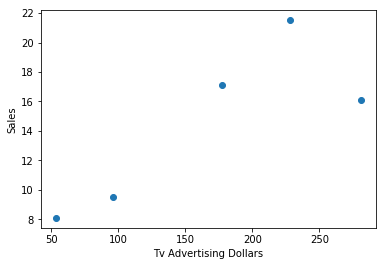

In [3]:
plt.scatter(X, y)
plt.ylabel('Sales')
plt.xlabel('Tv Advertising Dollars')
plt.show()

In [4]:
data.drop(['Radio', 'Newspaper'], axis=1)

,TV,Sales
35,95.7,9.5
61,53.5,8.1
151,280.7,16.1
42,177.0,17.1
40,228.0,21.5


In [5]:
def regression_formula(x, slope, intercept):
    return slope * x + intercept

Now, we need an initial starting point for gradient descent. Let's choose 0.1 as our initial slope and 0 for our intercept. 

In [6]:
slope1 = 0.1
intercept1 = 0

/Users/amberyandow/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


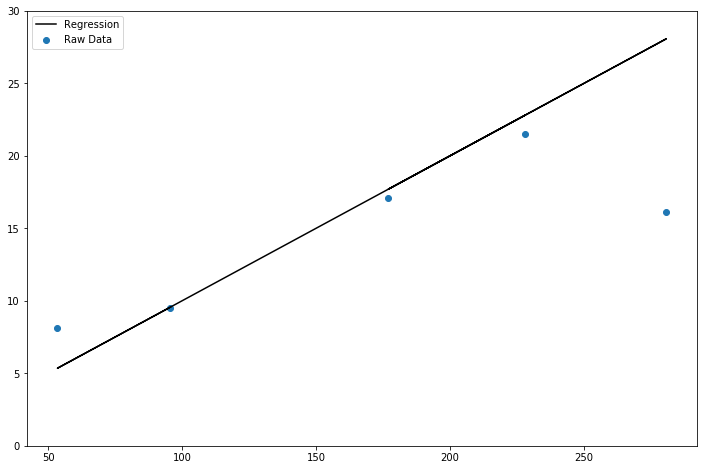

In [7]:
fig = plt.figure(figsize = (12, 8))
plt.scatter(X, y, label = 'Raw Data')
axes = plt.axes()
axes.set_ylim([0, 30])
plt.plot(X, regression_formula(X, slope1, intercept1), color = 'k', label = 'Regression')
plt.legend()
plt.show()

**Arithmatically, our function looks like this:**

    Sales = 0.1(TV $) + 0 
    
Now, let's calculate the Sum of Squared Error(Cost function) for this line by plugging in the predicted x-value into our formula and getting the predited y-value and substracting it from the actual y-value. 

![](https://github.com/justmarkham/DAT4/raw/068d887e4be2eedb1b958b345ae097153f762d75/notebooks/08_estimating_coefficients.png)

## Steps to find the optimal slope and intercept of a line of best fit using RSS as our cost function 

1. Take the derivative of the loss function for each parameter(gradient).
2. Pick random values for the parameters. 
3. Plug the parameter values into the derivatives. 
4. Calculate the step sizes (slope * learning rate) 
5. Calculate new parameters (old parameters - step size) 
6. Repeat steps 3-5 until max number of steps is reached or minimum step size is reached. 

## Derivatives in gradient descent 
**A derivative tells us how a function is changing at any given point in time. They calculate the rate of change** 



## Rules for taking Derivatives 

1. **Power Rule** - $$f(x) = x^r $$

Then, the derivative is: 
$$ f'(x) = r*x^{r-1} $$

2. **Constant factor rule** - $$f(x) = 2x^2 $$


$$f'(x) = 2*\frac{\Delta f}{\Delta x} x^{2} = 2*2*x^{2-1} = 4x^1 = 4x $$

3. **Addition Rule** - To take a derivative of a function that has multiple terms, simply take the derivative of each of the terms individually.  So for the function above, 

$$ f(x) = 4x^3 - x^2 + 3x $$

$$ f'(x) = 12x^2 - 2x + 3  $$  

4. **Chain Rule** - allows us to take partial derivatives of a function with respect to the other variables. See [learn.co lesson](https://learn.co/tracks/module-3-data-science-career-2-1/appendix/more-on-derivatives/derivatives-the-chain-rule)


## OOP gradient descent with Linear Regression using MSE

### Steps to find the optimal slope and intercept of a line of best fit using SSR as our cost function 
1. Take the partial derivative of the loss function for each parameter(gradient).
2. Pick random values for the parameters. 
3. Plug the parameter values into the derivatives. 
4. Calculate the step sizes (slope * learning rate) 
5. Calculate new parameters (old parameters - step size) 
6. Repeat steps 3-5 until max number of steps is reached or minimum step size is reached. 



In [8]:
import numpy as np 

class GradientDescentRSS:

    def __init__(self, learning_rate=.1, iterations=1000):
        self.learning_rate, self.iterations = learning_rate, iterations 
        
    def fit(self, X, y):
        m = 0
        b = 0
        n = X.shape[0]
        for _ in range(self.iterations):
            b_gradient = -2 * np.sum(y - m*X + b) / n 
            m_gradient = -2 * np.sum(X*(y - (m*X + b))) / n
            b = b + (self.learning_rate * b_gradient)
            m = m - (self.learning_rate * m_gradient)
        
        self.m, self.b = m, b 
        
    def predict(self, X):
        return self.m*X + self.b 
            

In [9]:
#cloud of points normally distributed around the line y=x 
np.random.seed(42)
X = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.5)
y = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.25)

In [11]:
lr = GradientDescentRSS()
lr.fit(X, y)

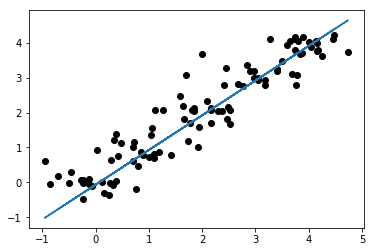

In [12]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.scatter(X, y, color='black')
plt.plot(X, lr.predict(X))

In [13]:
print(lr.b)
print(lr.m)

-0.06737711529735575
0.9949295068164402
